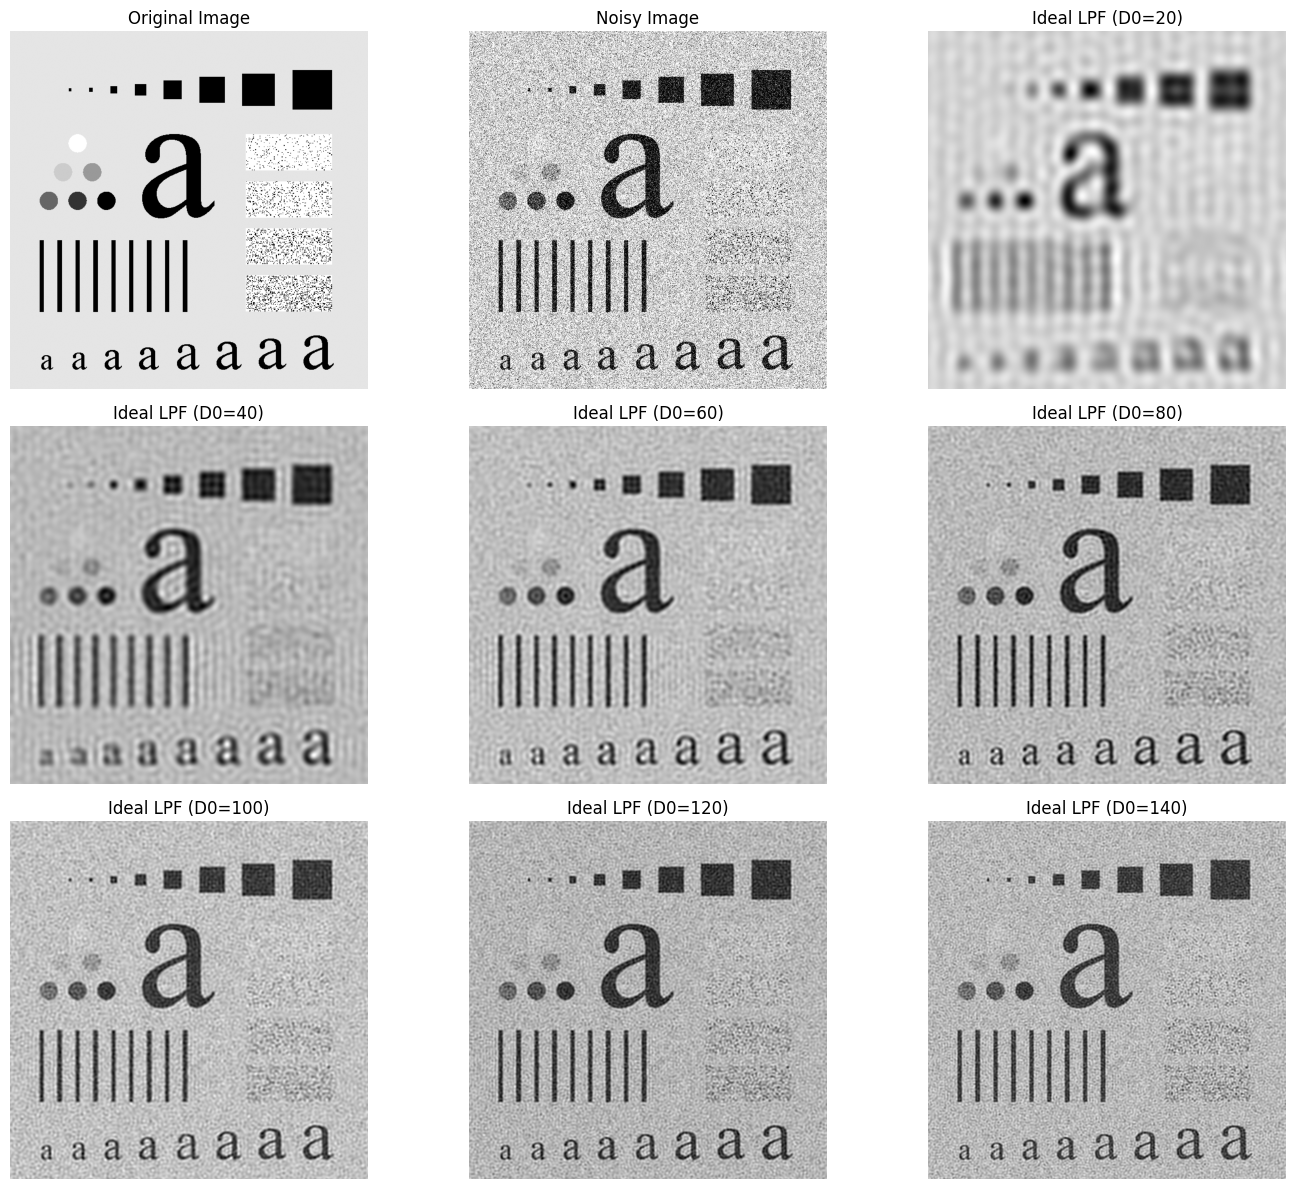

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, sigma=90):
    noise = np.random.normal(mean, sigma, image.shape)
    return np.clip(image + noise, 0, 255).astype(np.uint8)

# Function to compute the FFT and shift the zero frequency to the center
def compute_fft(image):
    return np.fft.fftshift(np.fft.fft2(image))

# Function to compute the inverse FFT and retrieve the real part
def compute_ifft(image):
    return np.fft.ifft2(np.fft.ifftshift(image)).real

# Function to create and apply an Ideal Low-Pass Filter in the frequency domain
def apply_ideal_low_pass_filter(image, cutoff):
    H, W = image.shape
    y, x = np.ogrid[:H, :W]
    center = (H // 2, W // 2)
    distance = np.sqrt((y - center[0]) ** 2 + (x - center[1]) ** 2)
    
    # Create filter mask: Pass frequencies below cutoff
    ideal_filter = (distance <= cutoff).astype(np.float32)
    
    return image * ideal_filter  # Apply filter in frequency domain

# Load grayscale image
image_path = "img3.tif"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Initialize figure for plotting
plt.figure(figsize=(16, 12))

# Display Original Image
plt.subplot(3, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Add Gaussian Noise
noisy_image = add_gaussian_noise(original_image)
plt.subplot(3, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

# Compute FFT of noisy image
fft_image = compute_fft(noisy_image)

# Apply Ideal Low-Pass Filter with different cutoff frequencies
for idx, cutoff in enumerate(range(20, 141, 20), start=3):
    filtered_dft = apply_ideal_low_pass_filter(fft_image, cutoff)
    filtered_image = compute_ifft(filtered_dft)

    plt.subplot(3, 3, idx)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f"Ideal LPF (D0={cutoff})")
    plt.axis('off')
    plt.tight_layout()

